# PUI2016 HW5 - jp4772
## Assignment 2

### Instructions

>You may know that it is estimated that women earn about 78% of men in the same job position.
You will test if it is true on real income data, and turn your model into a prediction: 
if you get hired at a certain stipend as a men, what should you expect to make as a woman? 

>Your notebook must: 
- have all celled filled in as indicated
- properly organize the data
- plot the scatter matrix
- plot the data (female vs male income) as directed
- do and plot a linear regression to the data, only Total Median Income and median income by category
- compare the linear regressions
- have predictions at the end of a salaty for a female, given the corresponding male salary

In [207]:
from __future__ import print_function, division
import sys
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy import stats 

plt.style.use('ggplot')
%matplotlib inline

## 0. Import and clean data

In [2]:
# Create the two python dictionaries
allMales = {
    "all": pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_1.xls"),
    "white": pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_4.xls"),
    "black": pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_6.xls"),
    "hispanic": pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_9.xls"),
    "asian":pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_8.xls")
}

allFemales = {
    "all": pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_1.xls"),
    "white": pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_4.xls"),
    "black": pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_6.xls"),
    "hispanic": pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_9.xls"),
    "asian":pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_8.xls")
}

In [3]:
# The files, indeed, are a mess
allMales["all"]

,Table with row headers in column A and column headers in rows 10 through 11,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,PINC-08. Source of Income in 2013- People 15 Y...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Data are based on the CPS ASEC sample of 68,00...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"For information on confidentiality protection,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Source: U.S. Census Bureau, Current Population...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(Numbers in thousands. People 15 Years old and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15 Years and Over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,All Races,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,NaN,Mean income,NaN,Gini ratio,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror


In [4]:
# Loop over both dictionaries, making the 8th row the column names, 
# then deleting the first 10 rows of intro/useless data
for gender in [allMales, allFemales]:
    for ethnicity, df in gender.items():
        df.columns = df.iloc[8]
        df.columns.name = np.nan # Remove column row name

        df.drop(range(0,10), inplace=True)
        df.drop(57, inplace=True) # Drop last row without data as well.
        df.reset_index(inplace=True, drop=True)

        df.columns.values[44] = "Median income Std"
        df.columns.values[46] = "Mean income Std"
        df.columns.values[48] = "Gini Ratio Std"

## 1. Descriptive Phase

In [5]:
# Quick exploratory print out
for genderDf in [allMales, allFemales]:
    for ethnicity, df in genderDf.items():
        print("--- %s ---" % (ethnicity))
        print(df.describe())

--- black ---
nan                     Characteristic  Total with Income  \
count                               47                 46   
unique                              47                 44   
top     ..Company or Union Retirement                 167   
freq                                 1                  2   

nan     $1 to $2,499 or loss  $2,500 to $4,999  $5,000 to $7,499  \
count                     46                46                46   
unique                    36                33                33   
top                        0                 0                 0   
freq                       6                 8                10   

nan     $7,500 to $9,999  $10,000 to $12,499  $12,500 to $14,999  \
count                 46                  46                  46   
unique                32                  26                  29   
top                    0                   0                   0   
freq                   6                  16                   9   

## 2. Exploratory Phase

The data is quite dirty and will need to be cleaned before it can be plotted.

In [6]:
# Check that indeed there are more rows than real values
print (allMales['asian'].shape)
allMales['asian'].applymap(np.isreal).sum()

(47, 49)


nan
Characteristic           0
Total with Income       47
$1 to $2,499 or loss    47
$2,500 to $4,999        47
$5,000 to $7,499        47
$7,500 to $9,999        47
$10,000 to $12,499      47
$12,500 to $14,999      47
$15,000 to $17,499      47
$17,500 to $19,999      47
$20,000 to $22,499      47
$22,500 to $24,999      47
$25,000 to $27,499      47
$27,500 to $29,999      47
$30,000 to $32,499      47
$32,500 to $34,999      47
$35,000 to $37,499      47
$37,500 to $39,999      47
$40,000 to $42,499      47
$42,500 to $44,999      47
$45,000 to $47,499      47
$47,500 to $49,999      47
$50,000 to $52,499      47
$52,500 to $54,999      47
$55,000 to $57,499      47
$57,500 to $59,999      47
$60,000 to $62,499      47
$62,500 to $64,999      47
$65,000 to $67,499      47
$67,500 to $69,999      47
$70,000 to $72,499      47
$72,500 to $74,999      47
$75,000 to $77,499      47
$77,500 to $79,999      47
$80,000 to $82,499      47
$82,500 to $84,999      47
$85,000 to $87,499      

In [7]:
# Coerce strings into NaN and set all numeric values to floats
for gender in [allMales, allFemales]:
    for ethnicity, df in gender.items():
        for c in df.columns:
            if c != "Characteristic":
                df[c] = pd.to_numeric(df[c], errors="coerce")

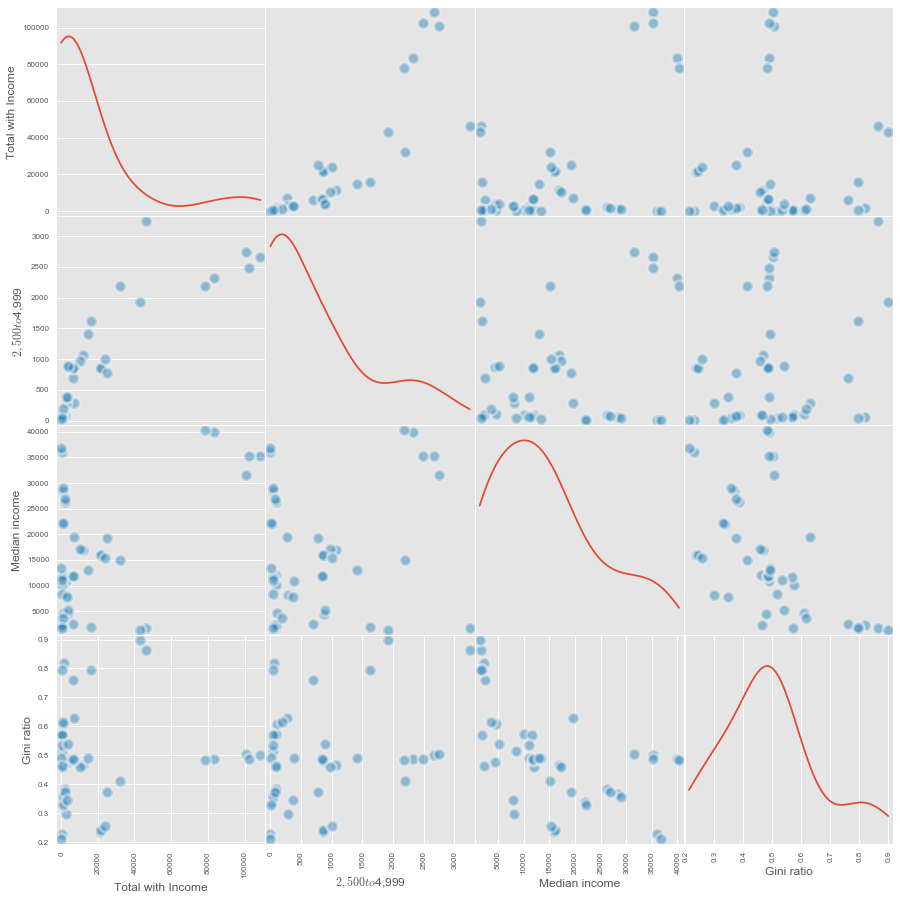

In [208]:
# Scatter matrix for men
fig = pd.scatter_matrix(allMales['all'][['Total with Income', '$2,500 to $4,999', 'Median income', 'Gini ratio']],
                        linewidth=3, s=500, figsize=(15,15), diagonal='kde') 

### Figure 1: Scatter matrix for all males of all ethnicities.

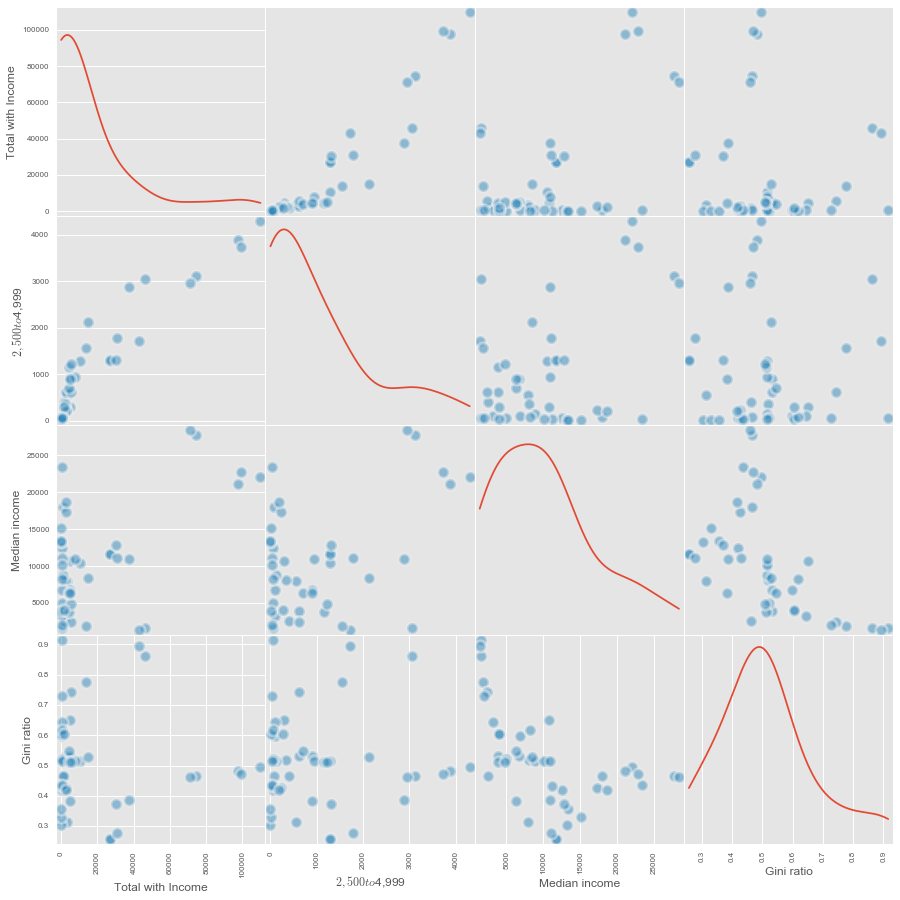

In [209]:
# Scatter matrix for women
fig = pd.scatter_matrix(allFemales['all'][['Total with Income', '$2,500 to $4,999', 'Median income', 'Gini ratio']],
                        linewidth=3, s=500, figsize=(15,15), diagonal='kde') 

### Figure 2: Scatter matrix for all females of all ethnicities.

## 3. Male/Female income comparisons

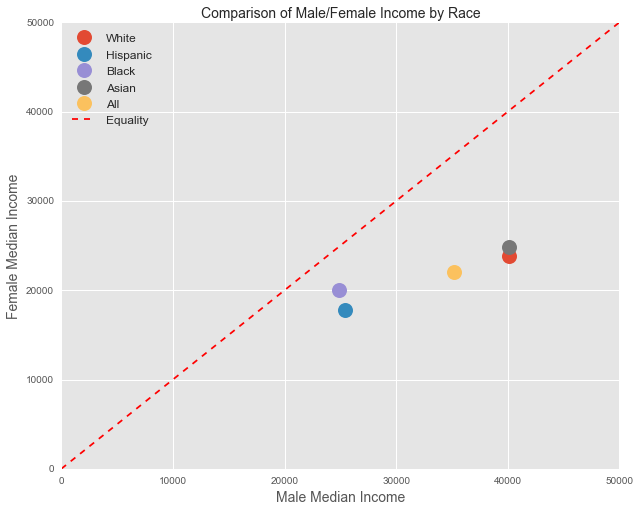

In [210]:
f, ax = plt.subplots(figsize=(10, 8))

ax.set_xlim([0,50000])
ax.set_ylim([0,50000])

ax.plot(allMales["white"]["Median income"][0], allFemales["white"]["Median income"][0], "o", markersize=15, label="White")
ax.plot(allMales["hispanic"]["Median income"][0], allFemales["hispanic"]["Median income"][0], "o", markersize=15, label="Hispanic")
ax.plot(allMales["black"]["Median income"][0], allFemales["black"]["Median income"][0], "o", markersize=15, label="Black")
ax.plot(allMales["asian"]["Median income"][0], allFemales["asian"]["Median income"][0], "o", markersize=15, label="Asian")
ax.plot(allMales["all"]["Median income"][0], allFemales["all"]["Median income"][0], "o", markersize=15, label="All")

pltX = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
ax.plot(pltX, pltX, "r--", label="Equality")
    
ax.legend(loc=2, fontsize=12)
ax.set_title("Comparison of Male/Female Income by Race", fontsize=14)
ax.set_xlabel("Male Median Income", fontsize=14)
ax.set_ylabel("Female Median Income", fontsize=14)

### Figure 3: Scatter plot comparing male and female median incomes per ethnicity with equality line for reference.

## 4. Fit data to a line

**NOTE**: The skeleton notebook includes 'all' ethnicities throughout the regression examples. I may be incorrect, but this doesn't make sense to me if we're trying to compare races and make predictive models. Won't the 'all' category skew the results? Because of this concern, I don't include 'all' in any of the following examples. Everything else is the same. I do still plot 'All' as it can be a useful data point for comparison.

In [216]:
# Create arrays of scattered points and find a best fit line.

xFit = [
        allMales["white"]["Median income"][0],
        allMales["hispanic"]["Median income"][0],
        allMales["black"]["Median income"][0],
        allMales["asian"]["Median income"][0]
       ]
yFit = [
        allFemales["white"]["Median income"][0],
        allFemales["hispanic"]["Median income"][0],
        allFemales["black"]["Median income"][0],
        allFemales["asian"]["Median income"][0]
       ]

m, b = np.polyfit(xFit, yFit, 1)

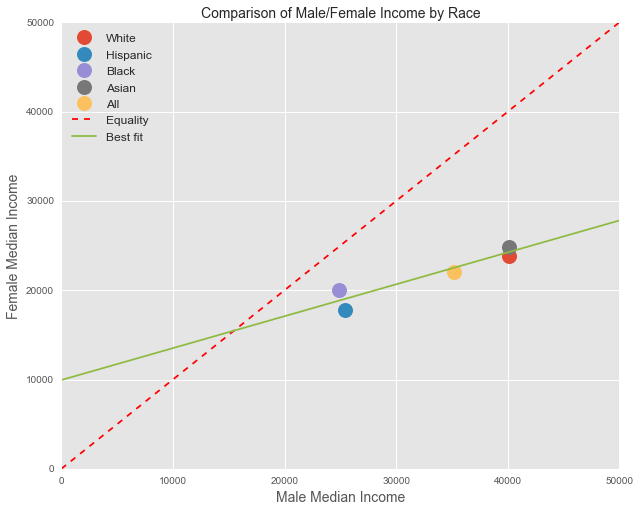

In [217]:
# Plot best fit line along with scatter plot and equality line

f, ax = plt.subplots(figsize=(10, 8))

ax.set_xlim([0,50000])
ax.set_ylim([0,50000])

ax.plot(allMales["white"]["Median income"][0], allFemales["white"]["Median income"][0], "o", markersize=15, label="White")
ax.plot(allMales["hispanic"]["Median income"][0], allFemales["hispanic"]["Median income"][0], "o", markersize=15, label="Hispanic")
ax.plot(allMales["black"]["Median income"][0], allFemales["black"]["Median income"][0], "o", markersize=15, label="Black")
ax.plot(allMales["asian"]["Median income"][0], allFemales["asian"]["Median income"][0], "o", markersize=15, label="Asian")  
ax.plot(allMales["all"]["Median income"][0], allFemales["all"]["Median income"][0], "o", markersize=15, label="All")
    
pltX = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
ax.plot(pltX, pltX, "r--", label="Equality")
ax.plot(pltX, m*pltX + b, '-', label="Best fit")
    
ax.legend(loc=2, fontsize=12)
ax.set_title("Comparison of Male/Female Income by Race", fontsize=14)
ax.set_xlabel("Male Median Income", fontsize=14)
ax.set_ylabel("Female Median Income", fontsize=14)

### Figure 4: Scatter plot comparing male and female median incomes per ethnicity with equality line and best fit line for reference.

In [111]:
# Analytical best line. Code adapted from Frederica Bianca's example.
# Removed that 'all' data as it adds redudant data because it represents all the races put together,
# skewing the analysis.

olsMales=np.array([0., 
                    allMales['white']['Median income'][1],
                    allMales['black']['Median income'][1],
                    allMales['hispanic']['Median income'][1],
                    allMales['asian']['Median income'][1]]
                  )

olsFemales=np.array([0.] + [allFemales[k]['Median income'][1] for k in ['white', 'black', 'hispanic','asian']])

cor = stats.spearmanr(olsMales, olsFemales)
olsM = cor[0] * olsFemales.std() / olsMales.std()
olsB = olsFemales.mean() - beta1 * olsMales.mean()

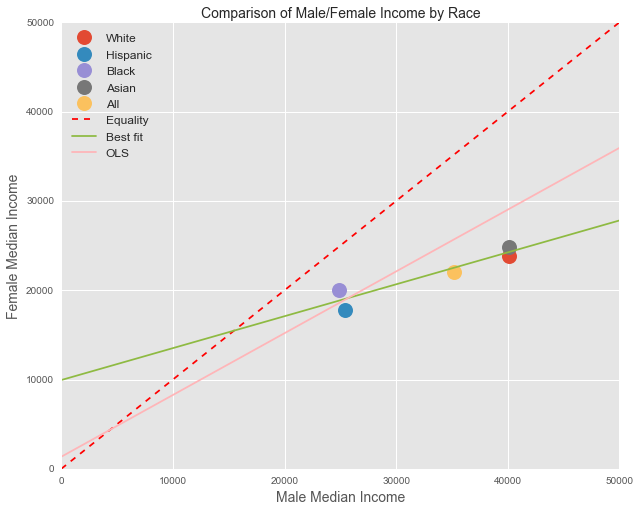

In [218]:
# Plot best fit line along with scatter plot and equality line

f, ax = plt.subplots(figsize=(10, 8))

ax.set_xlim([0,50000])
ax.set_ylim([0,50000])

ax.plot(allMales["white"]["Median income"][0], allFemales["white"]["Median income"][0], "o", markersize=15, label="White")
ax.plot(allMales["hispanic"]["Median income"][0], allFemales["hispanic"]["Median income"][0], "o", markersize=15, label="Hispanic")
ax.plot(allMales["black"]["Median income"][0], allFemales["black"]["Median income"][0], "o", markersize=15, label="Black")
ax.plot(allMales["asian"]["Median income"][0], allFemales["asian"]["Median income"][0], "o", markersize=15, label="Asian")
ax.plot(allMales["all"]["Median income"][0], allFemales["all"]["Median income"][0], "o", markersize=15, label="All")
    
pltX = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
ax.plot(pltX, pltX, "r--", label="Equality")
ax.plot(pltX, m*pltX + b, '-', label="Best fit")
ax.plot(pltX, olsM*pltX + olsB, '-', label="OLS")
    
ax.legend(loc=2, fontsize=12)
ax.set_title("Comparison of Male/Female Income by Race", fontsize=14)
ax.set_xlabel("Male Median Income", fontsize=14)
ax.set_ylabel("Female Median Income", fontsize=14)

### Figure 5: Scatter plot comparing male and female median incomes er ethnicity with lines for equality, best fit, and OLS regression.

## 5. Adding all forms of income

In [135]:
# Create dataframe with all median incomes for men and women across the four ethnicities we're dealing with
allMedians = pd.DataFrame(data={
    "males": np.concatenate([allMales[k]['Median income'][:].values for k in ['white', 'black', 'hispanic', 'asian']]).flatten(),
    "females": np.concatenate([allFemales[k]['Median income'][:].values for k in ['white', 'black', 'hispanic', 'asian']]).flatten()
})

In [139]:
allMedians_m, allMedians_b = np.polyfit(allMedians.dropna().males, allMedians.dropna().females, 1)

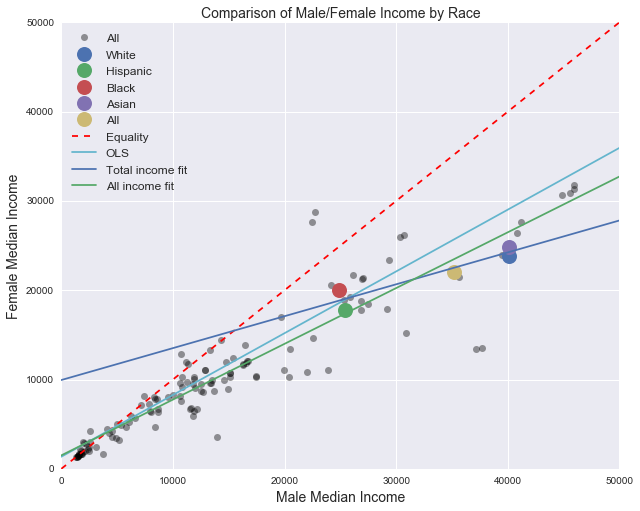

In [205]:
# Plot best fit line along with scatter plot and equality line

f, ax = plt.subplots(figsize=(10, 8))

ax.set_xlim([0,50000])
ax.set_ylim([0,50000])

# Plot the scatter points
ax.plot(allMedians.dropna().males, allMedians.dropna().females, "o", label="All", color="black", alpha=.4)
ax.plot(allMales["white"]["Median income"][0], allFemales["white"]["Median income"][0], "o", markersize=15, label="White")
ax.plot(allMales["hispanic"]["Median income"][0], allFemales["hispanic"]["Median income"][0], "o", markersize=15, label="Hispanic")
ax.plot(allMales["black"]["Median income"][0], allFemales["black"]["Median income"][0], "o", markersize=15, label="Black")
ax.plot(allMales["asian"]["Median income"][0], allFemales["asian"]["Median income"][0], "o", markersize=15, label="Asian") 
ax.plot(allMales["all"]["Median income"][0], allFemales["all"]["Median income"][0], "o", markersize=15, label="All")

# Plot the lines
pltX = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
ax.plot(pltX, pltX, "r--", label="Equality")
ax.plot(pltX, olsM*pltX + olsB, '-', label="OLS")
ax.plot(pltX, m*pltX + b, '-', label="Total income fit")
ax.plot(pltX, allMedians_m*pltX + allMedians_b, '-', label="All income fit")

# Add legends and title
ax.legend(loc=2, fontsize=12)
ax.set_title("Comparison of Male/Female Income by Race", fontsize=14)
ax.set_xlabel("Male Median Income", fontsize=14)
ax.set_ylabel("Female Median Income", fontsize=14)

### Figure 6: Scatter plot of all incomes and ethnicities as well as Total Median Income per ethnicity. Best fit lines for all incomes and total median incomes as well as equality provided for reference.

## 6. Prediction

To predict a female salary based on a male salary (and to demonstrate the injustice), I'll use the the most generous model: the OLS regression of all incomes.

We'll pick a decent salary: $65,000.

In [193]:
# Plugging that into our line

maleSalary = 65000
femaleSalary = olsM*maleSalary + olsB

print("Female salary for $65000: $%.2f" % (femaleSalary))

Female salary for $65000: $46316.12


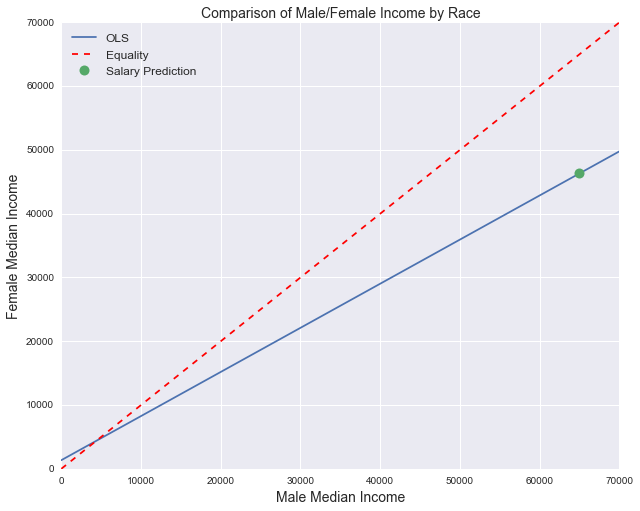

In [201]:
# Let's plot it for the kicks
f, ax = plt.subplots(figsize=(10, 8))

ax.set_xlim([0,70000])
ax.set_ylim([0,70000])

pltX = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
ax.plot(pltX, olsM*pltX + olsB, '-', label="OLS")
ax.plot(pltX, pltX, "r--", label="Equality")
ax.plot(maleSalary, olsM*maleSalary + olsB, 'o', markersize=10, label="Salary Prediction")

# Add legends and title
ax.legend(loc=2, fontsize=12)
ax.set_title("Comparison of Male/Female Income by Race", fontsize=14)
ax.set_xlabel("Male Median Income", fontsize=14)
ax.set_ylabel("Female Median Income", fontsize=14)

### Figure 7: Equality and OLS regression prediction lines with predicted female salary for a male salary at $65,000

## 7. Comments on Income and Race

Yes. First, though in aggregate black Americans earn less money, they are the closest to equality amongst the sexes. Hispanics earn the least overall, and Asians the most. White Americans are the least equal in terms of gender pay.